In [1]:
import torchio as tio
import matplotlib.pyplot as plt
import nibabel as nib
import os
from pathlib import Path




/Users/andrasjoos/Documents/AI_masters/Thesis/thesis_project/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


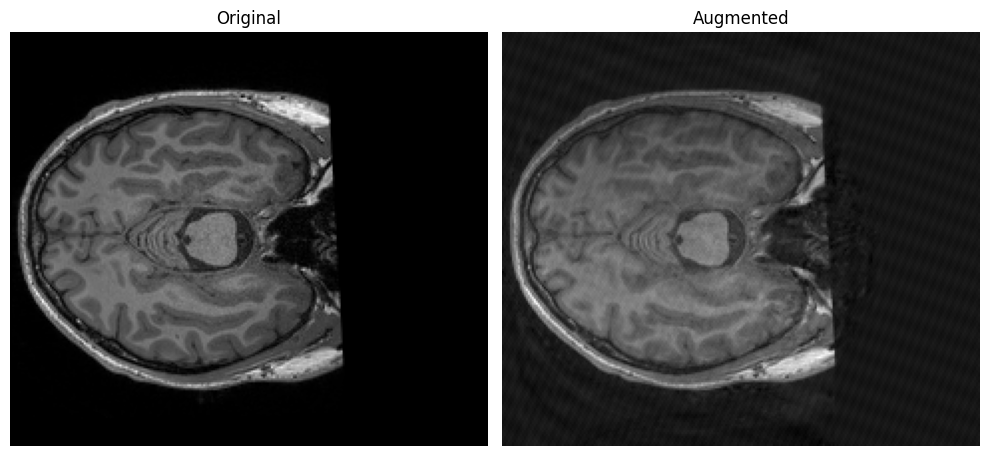

In [2]:
def torchio_augmentation_demo():
    # Specify the path to your NIfTI file
    # Example path from OpenNeuro dataset (you'll need to modify this)
    image_path = "sub-01_T1w.nii.gz"

    # Load the image
    subject = tio.Subject(
        mri=tio.ScalarImage(image_path)
    )

    # Define transforms
    transforms = tio.Compose([
        # Motion artifact
        tio.RandomMotion(p=1.0,
                        degrees=45,
                        translation=10,
                        num_transforms=2),

        # Ghosting artifact
        tio.RandomGhosting(p=1.0,
                          num_ghosts=(4, 10),
                          axes=(0, 1),
                          intensity=(0.5, 1)),

        # Bias field artifact
        tio.RandomBiasField(p=1.0),

        # Noise artifact
        tio.RandomNoise(p=1.0, std=(0, 0.1)),

        # Random spike artifact
        tio.RandomSpike(p=1.0, num_spikes=3, intensity=(0.1, 0.3))
    ])

    # Apply transformations
    augmented_subject = transforms(subject)

    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original image - middle slice
    original_data = subject.mri.data[0, :, :, subject.mri.data.shape[-1]//2]
    axes[0].imshow(original_data, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    # Augmented image - middle slice
    augmented_data = augmented_subject.mri.data[0, :, :, augmented_subject.mri.data.shape[-1]//2]
    axes[1].imshow(augmented_data, cmap='gray')
    axes[1].set_title('Augmented')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    torchio_augmentation_demo()